In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
#check current directory
import os
os.getcwd()

'C:\\Users\\fpalash\\Desktop\\R_and_Kaggle\\Python\\PRACTICE\\ML\\Linear Regression\\house_price_gradient_descent'

In [7]:
data = pd.read_csv('train.csv')
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [13]:
#Just playing with Python to create a fit between the Sale Price and Living Area, using gradient descent.
x = data['GrLivArea']
y = data['SalePrice']

#let's scale the predictor variable so as to improve gradient descent speed.
#data sets with high standard deviation may take longer to converge so scaling helps
x = (x - x.mean()) / x.std()

x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

In [14]:
#setting the parameters for descent
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with(coefficient of regression/error term)


In [15]:
#gradient descent function
def gradient_descent(x, y, theta, iterations, alpha): #defince all parameters
    past_costs = [] #this is where all the cost function value will be stored in appended form
    past_thetas = [theta] #this is where all the theta function value will be stored in appended form
    for i in range(iterations): #iteration range is 0-2000 as defined above
        prediction = np.dot(x, theta) #matrix multiplication
        error = prediction - y # finding error between predicted and actual value
        cost = 1/(2*m) * np.dot(error.T, error) #finding the loss function before next iteration
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error)) #finding optimum theta(coefficient) with the help of alpha and error
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


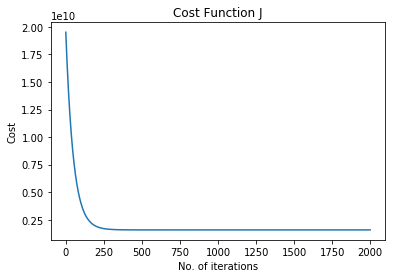

In [18]:
#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()
#as the no of itertion is increasing the cost function is descreasing just as expected

In [19]:
#creating an animation by copying code from somewhere
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable.



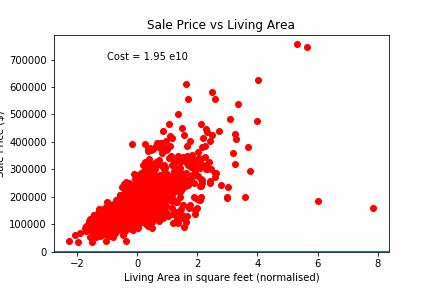

In [20]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))